# **The Age of Recommender Systems**

## 0.1 Table of Contents<a class="anchor" id="0.1"></a>

1. [About the Dataset](#1)
2. [Importing Dataset](#2)
3. [Data Exploration](#3)
4. [Data Pre-processing](#4)
5. [Item-Based Collaborative Filterings](#5)
6. [ Content-Based Collaborative Filterings](#6)
7. [Summary based Recommender](#7)
8. [Comparison of All Recommenders](#8)
9. [Conclusion](#9)

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  

They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Amazon, Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

(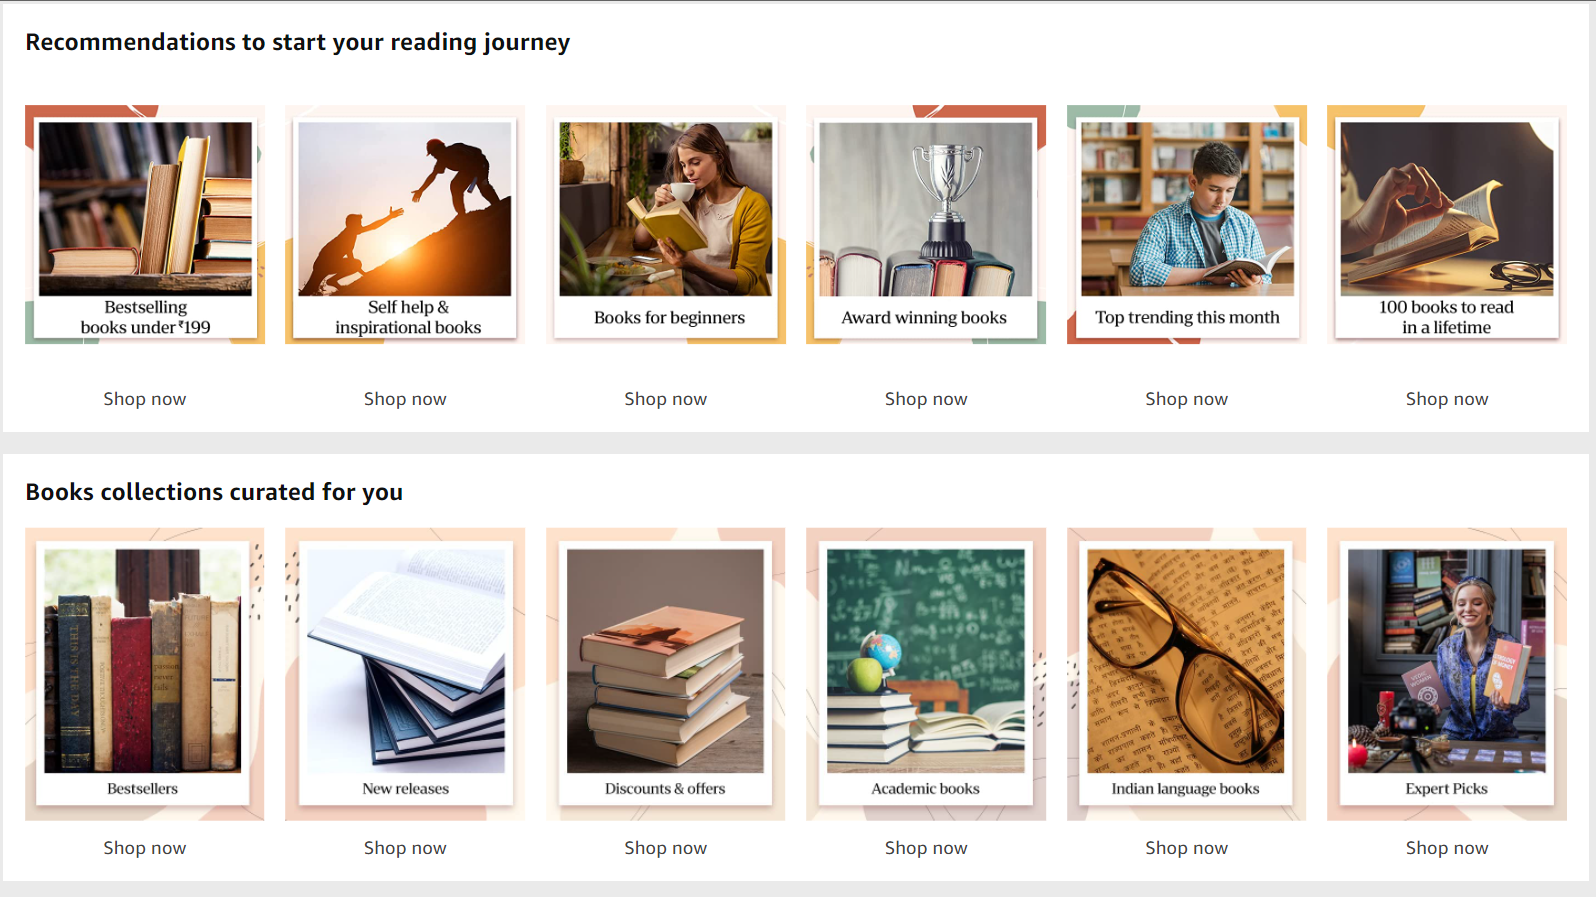https://screenrec.com/share/T0WdvCYHa7)

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

### About Dataset<a class="anchor" id="1"></a>
Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

In [1]:
import os
import re
import nltk
import requests
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Moin
[nltk_data]     Dalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Importing Dataset<a class="anchor" id="2"></a>

In [ ]:
books = pd.read_csv(r"C:\Users\Admin\Downloads\book.csv")
books.head()

Unnamed: 0  user_id                   location      age        isbn  \
0           0        2  stockton, california, usa  18.0000  0195153448   
1           1        8   timmins, ontario, canada  34.7439  0002005018   
2           2    11400    ottawa, ontario, canada  49.0000  0002005018   
3           3    11676              n/a, n/a, n/a  34.7439  0002005018   
4           4    41385   sudbury, ontario, canada  34.7439  0002005018   

   rating           book_title           book_author  year_of_publication  \
0       0  Classical Mythology    Mark P. O. Morford               2002.0   
1       5         Clara Callan  Richard Bruce Wright               2001.0   
2       0         Clara Callan  Richard Bruce Wright               2001.0   
3       8         Clara Callan  Richard Bruce Wright               2001.0   
4       0         Clara Callan  Richard Bruce Wright               2001.0   

                 publisher                                              img_s  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                               img_m  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                               img_l  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                             Summary Language  \
0  Provides an introduction to classical myths pl...       en   
1  In a small town in Canada, Clara Callan reluct...       en   
2  In a small town in Canada, Clara Callan reluct...       en   
3  In a small town in Canada, Clara Callan reluct...       en   
4  In a small town in Canada, Clara Callan reluct...       en   

             Category      city       state country  
0  ['Social Science']  stockton  california     usa  
1       ['Actresses']   timmins     ontario  canada  
2       ['Actresses']    ottawa     ontario  canada  
3       ['Actresses']       NaN         NaN     NaN  
4       ['Actresses']   sudbury     ontario  canada

### Data-Explorations<a class="anchor" id="3"></a>

In [45]:
books.Category.value_counts()

9                                            406102
['Fiction']                                  385135
['Juvenile Fiction']                          39617
['Biography & Autobiography']                 22390
['Humor']                                      8500
                                              ...  
['Angel (Fictitious character : Whedon)']         1
['Face']                                          1
['Church renewal']                                1
['Supermarkets']                                  1
['Alternative histories']                         1
Name: Category, Length: 6448, dtype: int64

### Pre-Processings<a class="anchor" id="4"></a>

In [20]:
df = books.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.drop(columns = ['Unnamed: 0','location','isbn',
                   'img_s','img_m','city','age',
                   'state','Language','country',
                   'year_of_publication'],axis=1,inplace = True) #remove useless cols

df.drop(index=df[df['Category'] == '9'].index, inplace=True) #remove 9 in category

df.drop(index=df[df['rating'] == 0].index, inplace=True) #remove 0 in rating

df['Category'] = df['Category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

df.head()

user_id  rating    book_title           book_author  \
1         8       5  Clara Callan  Richard Bruce Wright   
4     67544       8  Clara Callan  Richard Bruce Wright   
7    123629       9  Clara Callan  Richard Bruce Wright   
9    200273       8  Clara Callan  Richard Bruce Wright   
10   210926       9  Clara Callan  Richard Bruce Wright   

                publisher                                              img_l  \
1   HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4   HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
7   HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
9   HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
10  HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                              Summary   Category  
1   In a small town in Canada, Clara Callan reluct...  Actresses  
4   In a small town in Canada, Clara Callan reluct...  Actresses  
7   In a small town in Canada, Clara Callan reluct...  Actresses  
9   In a small town in Canada, Clara Callan reluct...  Actresses  
10  In a small town in Canada, Clara Callan reluct...  Actresses

### Item-Based Collaborative Filterings<a class="anchor" id="5"></a>

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.

In [23]:
def item_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in df['book_title'].values:
    
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 180].index
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            user_book_df = common_books.pivot_table(index=['user_id'],
                                                    columns=['book_title'],
                                                    values='rating')
        
            book = user_book_df[book_title]
            recom_data = pd.DataFrame(user_book_df.corrwith(book). \
                                      sort_values(ascending=False)).reset_index(drop=False)
            
            if book_title in [book for book in recom_data['book_title']]:
                recom_data = recom_data.drop(recom_data[recom_data['book_title'] == book_title].index[0])
                
            low_rating = []
            for i in recom_data['book_title']:
                if df[df['book_title'] == i]['rating'].mean() < 5:
                    low_rating.append(i)
                    
            if recom_data.shape[0] - len(low_rating) > 5:
                recom_data = recom_data[~recom_data['book_title'].isin(low_rating)]
            
            recom_data = recom_data[0:5]    
            recom_data.columns = ['book_title','corr']
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(recom_data['book_title'].tolist())):
        
                url = books.loc[books['book_title'] == recom_data['book_title'].tolist()[i],'img_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == recom_data['book_title'].tolist()[i]]['rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
    else:
        print('Cant find book in dataset, please check spelling')

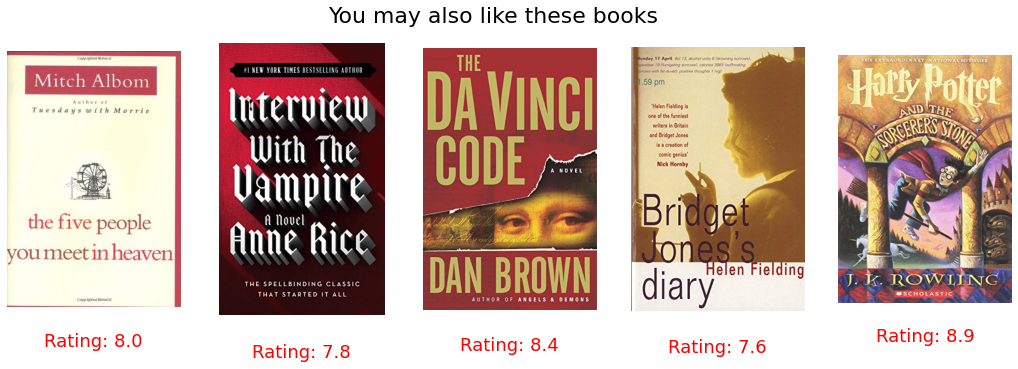

In [24]:
item_based_recommender('Fahrenheit 451')

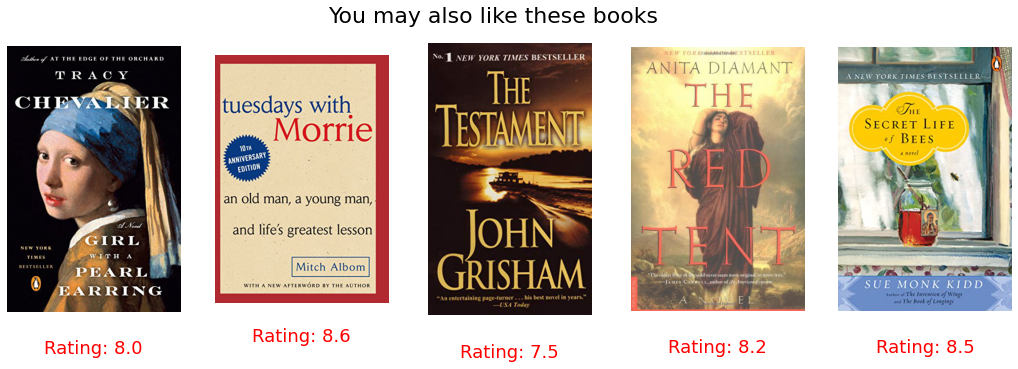

In [25]:
item_based_recommender('The Street Lawyer')

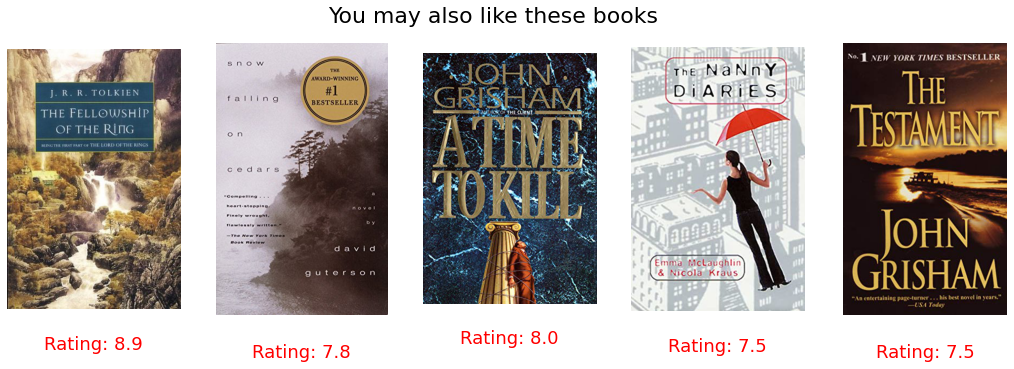

In [26]:
item_based_recommender('Divine Secrets of the Ya-Ya Sisterhood: A Novel')

### Content-Based Collaborative Filterings<a class="anchor" id="6"></a>

In this recommender system the content of the book (itle, Author, Publisher, Category etc) is used to find its similarity with other books. Then the books that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

In [27]:
def content_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in df['book_title'].values:
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 100].index
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            
            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['book_title','book_author','publisher','Category']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:6]
            
            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(books)):
        
                url = common_books.loc[common_books['book_title'] == books[i],'img_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == books[i]]['rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
                     
    else:
        
        print('Cant find book in dataset, please check spelling')

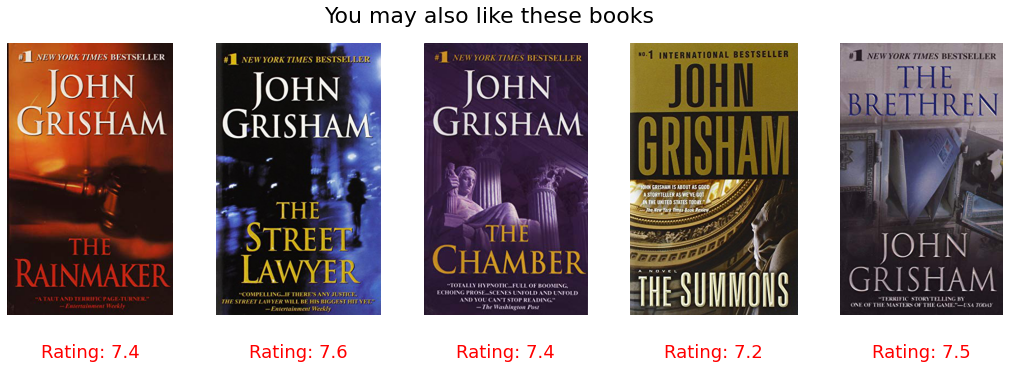

In [28]:
content_based_recommender('The Testament')

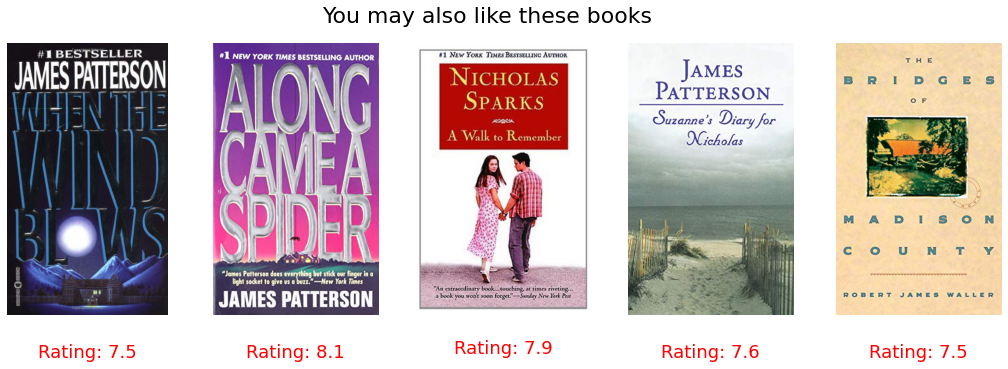

In [29]:
content_based_recommender('1st to Die: A Novel')

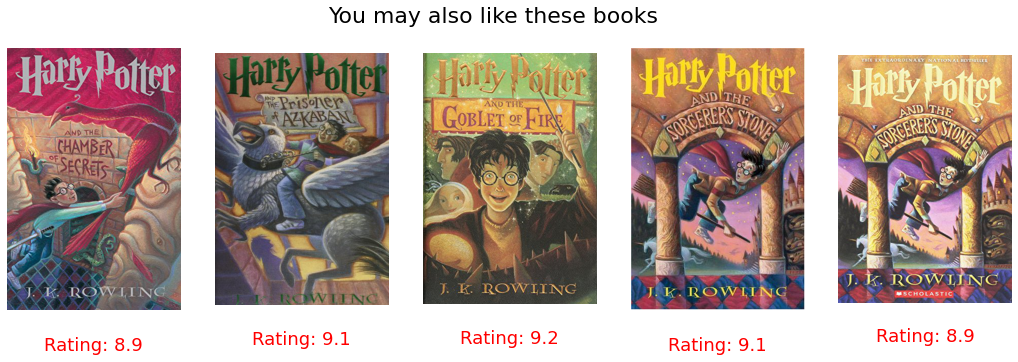

In [30]:
content_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

## **Summary based Recommender**<a class="anchor" id="7"></a>

We will compute pairwise similarity scores for all books based on their plot summary and recommend books based on that similarity score. The summary description is given in the **Summary** feature of our dataset. 
Let's take a look at the data. .. 

In [38]:
def content_based_recommender2(book_title):
    
    book_title = str(book_title)
    if book_title in df['book_title'].values:
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 100].index
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            
            summary_filtered = []
            for i in common_books['Summary']:
                
                i = re.sub("[^a-zA-Z]"," ",i).lower()
                i = nltk.word_tokenize(i)
                i = [word for word in i if not word in set(stopwords.words("english"))]
                i = " ".join(i)
                summary_filtered.append(i)
            
            common_books['Summary'] = summary_filtered   
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['Summary'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],reverse=True)[1:6]
            
            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(books)):
        
                url = common_books.loc[common_books['book_title'] == books[i],'img_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == books[i]]['rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
                     
    else:
        
        print('Cant find book in dataset, please check spelling')

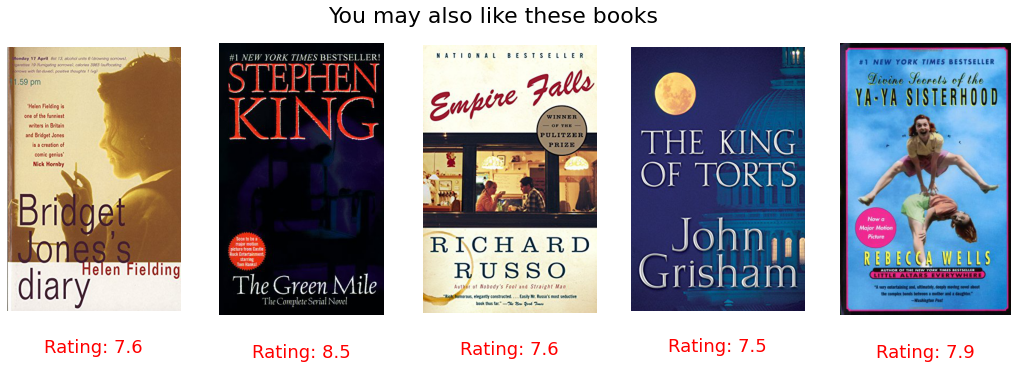

In [39]:
content_based_recommender2('To Kill a Mockingbird')

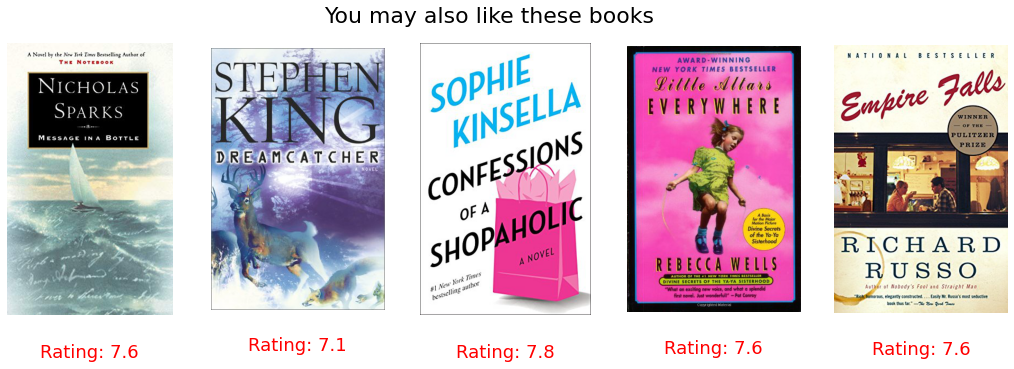

In [40]:
content_based_recommender2('A Walk to Remember')

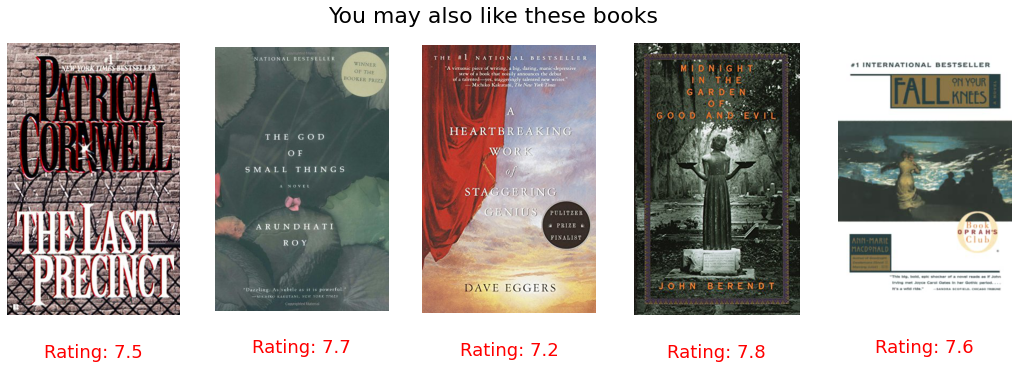

In [41]:
content_based_recommender2('A Painted House')

### Comparison of All Recommenders<a class="anchor" id="8"></a>

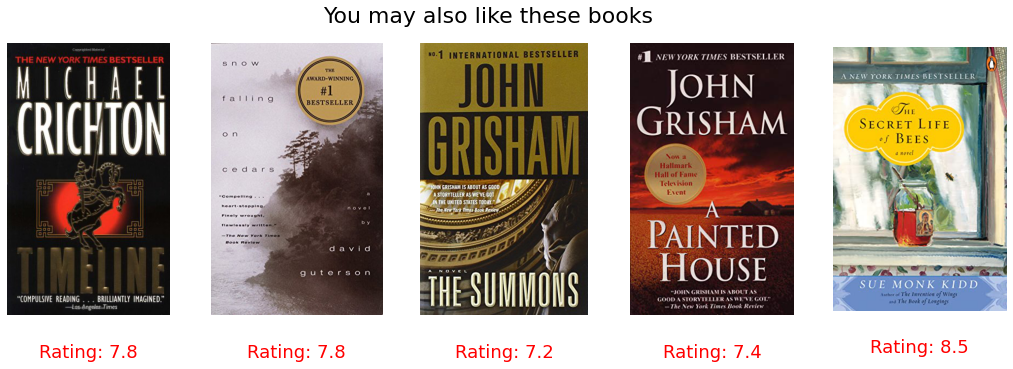

In [42]:
item_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

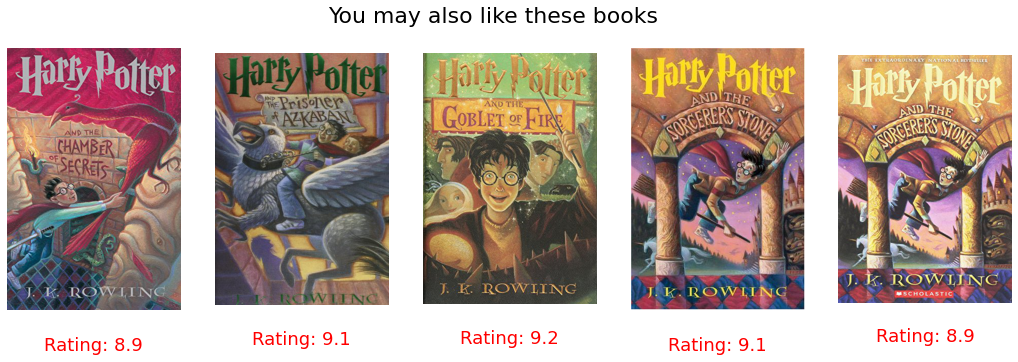

In [43]:
content_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

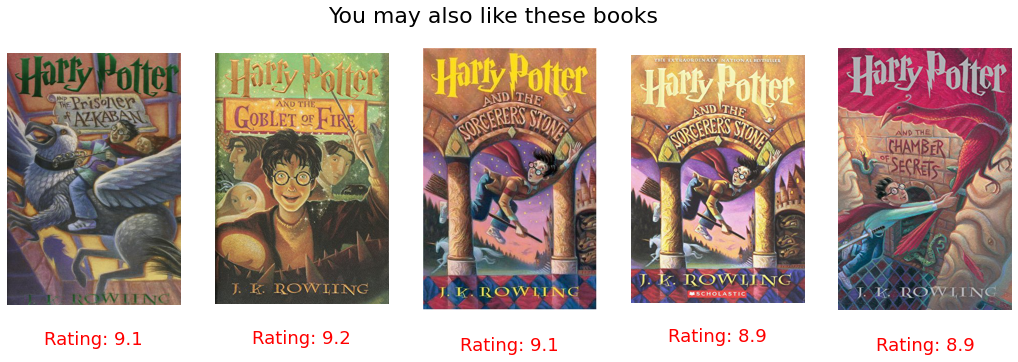

In [44]:
content_based_recommender2('Harry Potter and the Order of the Phoenix (Book 5)')

## **Conclusion** <a class="anchor" id="9"></a>
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

